In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings

In [4]:
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_excel("timeseries.xlsx")
df = df.set_index("GEO (Labels)")
df.shape # 37x12 = 444 --> N
df.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
GEO (Labels),,,,,,,,,,,,
Belgium,290.50,292.07,292.48,291.34,291.55,293.36,295.71,297.55,301.75,307.41,308.29,312.96
Bulgaria,369.53,366.42,375.47,378.10,386.26,391.45,397.67,398.69,404.54,413.76,424.49,421.71
Czechia,357.47,355.54,357.63,359.55,363.67,367.47,368.79,NaN,NaN,NaN,NaN,403.76
Denmark,345.81,357.94,365.12,372.59,378.92,383.76,384.94,387.74,392.93,399.82,410.89,419.44
Germany (until 1990 former territory of the FRG),348.63,354.06,361.89,374.81,387.70,394.64,403.50,410.82,413.93,418.65,424.88,431.09


In [6]:
df.isnull().sum().sum() # 99 nan varsa N = 444-99 = 345
pop = 345

In [7]:
describe = df.describe()
describe

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,28.000000,27.000000,29.000000,29.000000,30.000000,30.000000,30.000000,29.000000,28.000000,29.000000,29.000000,27.000000
mean,305.800714,317.599259,312.637931,317.460690,320.879667,326.057667,331.740667,344.245172,349.477143,354.922759,362.216552,373.644444
std,73.838985,64.662468,72.651263,73.511294,74.711789,74.981785,76.058535,65.554110,65.984802,65.486793,66.693354,62.701895
min,122.090000,209.780000,124.880000,124.960000,123.160000,127.430000,128.110000,217.110000,232.810000,241.580000,237.750000,276.410000
25%,263.297500,271.805000,270.400000,286.380000,281.245000,283.812500,286.215000,301.200000,307.727500,307.410000,310.110000,322.875000
50%,310.860000,323.330000,304.740000,308.560000,310.205000,315.425000,322.690000,335.880000,345.315000,345.650000,360.330000,366.960000
75%,361.705000,365.305000,365.120000,375.790000,383.460000,386.445000,388.742500,388.040000,395.832500,399.820000,410.890000,413.380000
max,453.780000,460.410000,468.910000,479.530000,484.220000,489.540000,498.850000,504.610000,509.120000,512.960000,518.280000,524.140000


In [10]:
pop_mean= describe.iloc[1]
pop_mean_value = pop_mean.mean()
pop_mean_value

334.7235553579031

In [36]:
pop_mean_df = pd.DataFrame(pop_mean)
pop_mean_df

,mean
2007,305.800714
2008,317.599259
2009,312.637931
2010,317.460690
2011,320.879667
2012,326.057667
2013,331.740667
2014,344.245172
2015,349.477143
2016,354.922759


In [13]:
Yıl = pop_mean_df.index
Değer = pop_mean_df.values

In [37]:
veri = pd.DataFrame([Yıl,Değer],index = ["Yıl","Ort Pretisyen Hekim Sayısı"],dtype ="int64" ).T
veri


,Yıl,Ort Pretisyen Hekim Sayısı
0,2007,305
1,2008,317
2,2009,312
3,2010,317
4,2011,320
5,2012,326
6,2013,331
7,2014,344
8,2015,349
9,2016,354


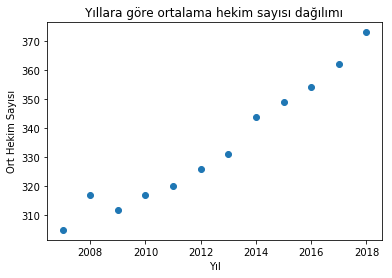

In [38]:
plt.scatter(veri.Yıl,veri["Ort Pretisyen Hekim Sayısı"])
plt.title("Yıllara göre ortalama hekim sayısı dağılımı")
plt.xlabel("Yıl")
plt.ylabel("Ort Hekim Sayısı")
plt.show()

scatter plot incelendiğinde noktaların doğrusala yakın ve her iki eksen içinde düşünüldüğünde pozitif yönde olduğu görülmektedir. Bu demek oluyor ki yıl arttıkça hekim sayısı artmaktadır. Dolayısı ile artık bir hipotez elde ettik diyebiliriz. Peki gerçekten pozitif yönlü bir güçlü bir ilişkiden bahsedebilir miyiz? Korelasyon analizi ile inceleyelim.

In [16]:
veri.corr() # Korelasyon 

,Yıl,Ort Hekim Sayısı
Yıl,1.000000,0.976276
Ort Hekim Sayısı,0.976276,1.000000


corr = 0.976276

Yıl ve ortalama hekim sayısı arasında oldukça güçlü (>.90) bir ilişki olduğunu görmekteyiz

Korelasyon bize sadece ve sadece bu iki değişken arasında bir ilişki olup olmadığını ve kuvvetini söyleyebilir. Ancak regresyon öyle mi? Tabi ki hayır, regresyon bize yılın hekim sayısı üzerindeki etkisini söyleyebilir. Ancak regresyon da sadece tahmin edip bize yaklaşık bir değer üretebilir. İşte modelleme yaparken başarı oranının artırılması için yapılan optimiazyon/transformansyon gibi çalışmalar bu yüzdendir.

Skatter plot ta yer alan noktaların arasında artık güçlü bir ilişki olduğunu korelasyon analizinde gördük. Peki biz bu noktaların arasından bir doğru(line) çizsek ve yeni gelecek olan değerler için yardımcı olsa, olabilir sanki. Scatter plot içindeki ilk noktaya bakalım 2007 de 275 hekim görülürken 2008 de 278 hekim görünüyor. Yani mükemmel doğrusallık bulunmuyor. Bizim öyle bir çizgi (line) belirlememiz gerekiyor ki tüm bu ortalamanın dışında kalanlar için bile yaklaşık bir tahminleme yapabilsin. O halde en popüler formül olan (E=mc²)’den sonra gelen regresyon formülünü paylaşıyorum.

Y = mX + b (doğrunun eğimi)

Y tahmin edilecek değer anlamında burada “Değer (hekim sayısı)” değişkenini ifade eder (dependent variable, target). X ise bağımsız değişkendir (Yordayan, independent variable, predictor). “m” eğimi verirken “b” ise sabit hata değeridir. Eğer biz doğruyu 2007 yılındaki noktadan itibaren çizmeye başlarsak formül “305 = m2007 + b” olacaktır. Doğru bu noktadan geçtiği için hata terimi 0'dır.

# Python’da Basit Lineer(Doğrusal) Regresyon Analizi

Öncelikle Python’da bulunan Statsmodels kütüphanesi üzerinden regresyon analizi yapacağız. Bunun sebebi Statsmodels’in tek bir fonksiyonu ile modelin yorumlanmasına izin veren tabloyu verebilmesi. Model yorumundan sonra ise Sklearn kütüphanesi ile makine öğrenmesini sağlayıp test edeceğiz.

In [17]:
import statsmodels.api as sm
x = veri.Yıl # bağımsız değişken (independent variable)
y_gercek = veri["Ort Hekim Sayısı"] # bağımlı değişken (target, dependent variable)
# Sabitin eklenmesi
x = sm.add_constant(x)
# Modelin çalıştırılması
model = sm.OLS(y_gercek,x).fit()
# Modelin yorumlanacağı tablo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Ort Hekim Sayısı   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     203.3
Date:                Sat, 29 May 2021   Prob (F-statistic):           5.69e-08
Time:                        21:41:20   Log-Likelihood:                -35.098
No. Observations:                  12   AIC:                             74.20
Df Residuals:                      10   BIC:                             75.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.152e+04    831.100    -13.856      0.0

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


[1] Standart Hatalar, hataların kovaryans matrisinin doğru şekilde belirtildiğini varsayar.

[2]. Durum numarası büyük, 1.17e+06. Bu, güçlü çoklu bağlantı veya diğer sayısal problemler olduğunu gösterebilir.

Yukarıdaki kodda görüldüğü üzere önce kütüphaneleri yükledik. Sonra makinemize öğretmek için kim bağımlı (target) kim bağımsız değişken onları gösterdik. Statsmodels kütüphanesinde yer alan OLS fonksiyonunun içerisine değişkenleri tanımlayıp modeli eğittik. Eğitilen modelin çıktılarını ise değerlendirmek için yukarıdaki tabloya bir bakalım.

OLS (Ordinary Least Squared): Sıradan en küçük kareler yöntemidir. Doğrusal regresyon modeli kurulurken verilerin ortasından geçen eğime (çizgiye) en az kare farkı ile yaklaşmaya çalışan bir yöntemdir.

R-Squared (R2): Verilerin yerleştirilmiş regresyon çizgisine ne kadar yakın olduğunun istatistiksel bir ölçüsüdür. Bizim tablomuzda bu değer 0.95 olup görece iyi bir sonuç diyebiliriz. Sosyal bilimler için 0.70 üzeri ve doğa bilimleri için ise değişkenlik göstermekte olup 0.60 üzeri kabul edilebilir bir başarı ölçütü sayılabilir.

Adjusted (Düzenlenmiş) R-Squared: Bu değer genellikle çoklu regresyon analizinde kullanılır. Modele değişken eklendikçe R2 değeri değişkeni etkili varsayıp varyansını açıkladığını sanabilir. Ancak düzenlenmiş R2 mantığında her bir değişkenin bağımlı değişken üzerindeki etkisi ölçülerek daha optimum sonuçlar vermektedir. Tabloyu yorumlarken bu iki değerin birbirine yakın çıkması önemli bir konu olup bizim tablomuzda her iki değerinde (0.95-0.94) birbirine yakın olduğu görülmektedir. Bu çıktının anlamak için şöyle bir örnek verilebilir. Örneğin bir evin hem brüt hem de net metrekaresi bulunur. Brüt metrekare her şeyi içine dahil ederken net ise sadece yaşam alanına odaklanır. Dolayısı ile ev bakarken bu ikisi arasındaki farkı bilmek önemlidir. Model sonucunu incelerken de bu alana bakılması önemlidir.

Coefficients (Katsayılar): Regresyon katsayısı, iki veya daha fazla değişken arasındaki ortalama fonksiyonel ilişkinin istatistiksel bir ölçüsüdür. Summary tablosunda const için yazan yerde regresyon formülündeki sabitin değerini verirken, Yıl için yazan yerde ise yıldaki bir birimlik değişimde hekim sayısının ne kadar değişeceğini göstermektedir. Dolayısı ile regresyon tahmin yaparken buradaki katsayılardan yararlanır. Formülde yerine yerleştirecek olursak; Y(tahmin edilecek değer) = X(Yıl) * m(Eğim) + b (sabit değer). Örneğin: 2007 yılında ortalama pretsiyen hekim sayısı 305

Şimdi regresyon doğrusunu çizdikten sonra bu modele göre 2007 yılındaki ortalama pretisyen hekim sayısının ne olacağını hesaplayalım. Y (ort pretisyen hekim saysı) = (2007 * 5.8881 ) + (-1.152e+04) ise tahmini gelir = 297.4167 olacaktır. Aradaki fark 7.6. Doğrusal bir model olduğu için en optimum noktadaki eğimin verdiği sonuç budur.

P-Value: Bu değer bize bağımsız değişkenden çıkan katsayının istatistiksel olarak anlamlı olup olmadığını vermektedir. Bilim dünyasında genel olarak kabul edilen anlamlılık değeri x<0.05'dir. Eğer bu değerin üzerinde bir sonuç çıkıyorsa ilgili bağımsız değişkenin modele etkisi anlamlı değildir. Bu değer, çok değişkenli regresyon analizinde değişkenlerin seçimi sırasında kullanılmaktadır. Summary'den çıkan P-Value değerinin ise .05'den küçük olduğu görülmekte olup yıl değişkeninin katsayısının istatistiksel olarak anlamlı olduğu düşünülebilir. Aslında yukarıdaki (4. madde) işlemin yapılmasından önce bu değerin kontrolünün sağlanması gerekmektedir.

Şimdi tablomuzu da incelediğimize göre model sonucunda oluşan regresyon doğrusunu yukarıda yer alan şekil 1'deki scatter plotun üzerine çizdirelim.

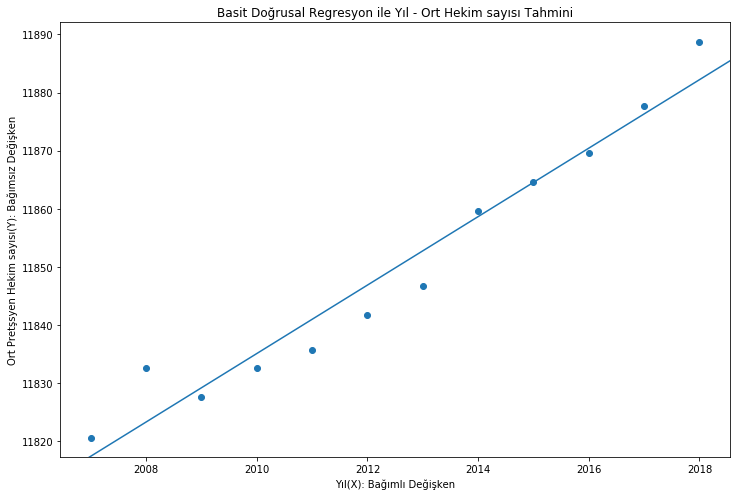

In [39]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_ccpr(model,"Yıl" ,ax=ax)
plt.title("Basit Doğrusal Regresyon ile Yıl - Ort Hekim sayısı Tahmini")
plt.xlabel("Yıl(X): Bağımlı Değişken")
plt.ylabel("Ort Pretşsyen Hekim sayısı(Y): Bağımsız Değişken")
plt.show()

regresyon doğrusu noktalar arasında en az hata yaparak çizilmiş durumda.

Peki inşa edilen modelde yaşa göre gelir ne çıkmaktadır? Bunun için önceden yazdığımız hekim sayısı (Değer) ile tahmin edilen hekim sayısını aynı tabloda yan yanan getirerek inceleyelim.

In [19]:
# Modelin var olan yıl değerleri için çalıştırılması
y_pred_stat = model.predict(x)
# Gerçek gelir değerleri ile tahmin edilen gelir değerlerinin birleştirilmesi
karsilastirma = pd.DataFrame({'Gercek_Degerler': y_gercek, 'Tahmin_Degerler': y_pred_stat}).sort_index()
# Gerçek değer ile tahmin edilen değer arasındaki hata
karsilastirma["tahminleme_hatalari"] = karsilastirma.Gercek_Degerler - karsilastirma.Tahmin_Degerler
print(karsilastirma)

    Gercek_Degerler  Tahmin_Degerler  tahminleme_hatalari
0               305       301.782051             3.217949
1               317       307.670163             9.329837
2               312       313.558275            -1.558275
3               317       319.446387            -2.446387
4               320       325.334499            -5.334499
5               326       331.222611            -5.222611
6               331       337.110723            -6.110723
7               344       342.998834             1.001166
8               349       348.886946             0.113054
9               354       354.775058            -0.775058
10              362       360.663170             1.336830
11              373       366.551282             6.448718


Sklearn Üzerinden Basit Doğrusal Regresyon
--

Python’da makine öğrenmesi algoritması inşa ederken Sklearn kullanılmasının birçok sebebi bulunmaktadır. Pipline gibi fonksiyonlara sahip olması ve geniş bir algoritma ağının bulunması bu kütüphanede yer alması sebepleri başta gösterilebilir. Aynı veri için Sklearn’de modeli inşa edelim.

In [20]:
# Yazının başında zaten bu kütüphaneleri import etmiştik ama yeniden paylaşıyorum
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# Doğrusal regresyon sınıfı çağırılıyor
lr = LinearRegression()

# Model verileri içine alarak uyarlanıyor
lr.fit(x,y_gercek)

# uyarlanan model aynı yaşlar için tahmini gelir sağtıyor
y_pred_sklearn = lr.predict(x)

# Gerçek gelir değerleri ile tahmin edilen gelir değerlerinin birleştirilmesi
karsilastirma = pd.DataFrame({'Gercek_Degerler': y_gercek, 'Tahmin_Degerler': y_pred_sklearn}).sort_index()
# Gerçek değer ile tahmin edilen değer arasındaki hata
karsilastirma["tahminleme_hatalari"] = karsilastirma.Gercek_Degerler - karsilastirma.Tahmin_Degerler
print(karsilastirma)

    Gercek_Degerler  Tahmin_Degerler  tahminleme_hatalari
0               305       301.782051             3.217949
1               317       307.670163             9.329837
2               312       313.558275            -1.558275
3               317       319.446387            -2.446387
4               320       325.334499            -5.334499
5               326       331.222611            -5.222611
6               331       337.110723            -6.110723
7               344       342.998834             1.001166
8               349       348.886946             0.113054
9               354       354.775058            -0.775058
10              362       360.663170             1.336830
11              373       366.551282             6.448718


Kodda görüldüğü üzere Sklearn kütüphanesi ile Statsmodels neredeyse aynı şekilde modeli çalıştırıyor. Ancak Sklearn kütüphanesinde Statsmodels’de olduğu gibi analiz özeti (Tablo 2) çıkarmıyor. Ancak yukarıdaki kodda yine gerçek ve tahmini gelirler ile hataları çıkarabileceğiniz karşılaştırma tablo kodunu ekledim. Ayrıca aşağıda modele dair diğer çıktıları da bulabilirsiniz.

In [21]:
print("coefficients ",lr.coef_)  # katsayı
print("intercept",lr.intercept_) # Kesim noktası
print("r2 score",metrics.r2_score(y_gercek,y_pred_sklearn))
print('Mean Squared Error:', metrics.mean_squared_error(y_gercek, y_pred_sklearn))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_gercek, y_pred_sklearn)))

coefficients  [0.         5.88811189]
intercept -11515.658508158504
r2 score 0.9531157083864589
Mean Squared Error: 20.32303807303637
Root Mean Squared Error: 4.508108036974754


Şimdi regresyon doğrusunu çizdikten sonra bu modele göre 2019 yılında kaç hekim olacağını hesaplayalım. Y (Hekim) = (2019 * 5.8881) + (-1.152e+04) ise tahmini gelir = 368.0739. Yani Avrupa ve çevresindeki ülkelerin pretisyen hekim sayısının 2019 da yaklaşık 368 olacağını söyleyebiliriz.